# Analiza receptov 

To je _projektna_ naloga  


In [30]:
import pandas as pd
import os.path
pd.options.display.max_rows = 10

recepti_vse = pd.read_csv(os.path.join("obdelani-podatki", "recepti.csv"))
recepti = recepti_vse.drop(columns = ["sestavine", "opis"])
kategorije = pd.read_csv(os.path.join("obdelani-podatki", "kategorije.csv"))
kulinarike = pd.read_csv(os.path.join("obdelani-podatki", "kulinarike.csv"))
oznake = pd.read_csv(os.path.join("obdelani-podatki", "oznake.csv"))


In [31]:
# %matplotlib notebook

%matplotlib inline


## <span style="color:yellow">TEKMOVANJE RECEPTOV</span>


> _“According to the National Academy of Sciences, current recommendations for healthy adults 
suggest a diet with 10 to 35 percent of calories from protein, 20 to 35 percent from fat, and 45 to 65 percent from carbohydrates.”_

<sup> <span style="color:gray">Vir:  https://www.healthyforlifemeals.com/blog/why-macronutrients-are-important </span><sup>


Po naši naivni formuli bo najbolša kategorija tista, pri kateri priprava jedi porabi 30 minut in 
ima najbolj raznoliko hranilno sestavo. Iz zgornjega vira določimo našo idealno hranilno sestavo: 
> **ogljikovi_hidrati : mascobe : beljakovine** = 50:25:25 = **2:1:1**  

Receptom bomo glede na te pogoje pripisali kazenske točke, s pomočjo teh pa bomo lahko kategorije razvrstili od najboljše do najslabše.

<sup><span style="color:gray">Pri računanju zaradi preglednosti preimenujemo kolicine ogljikovi_hidrati, mascobe, beljakovine v OH, M, B</span><sup>



**KRTITERIJ ZA KAZENSKE TOČKE:**
1. M + B = OH oz. k1 = OH  / (M+B) = 1
2. k2 = M/B = 1 
3. skupni_cas = 30min

5% oz. 5 min odmika od idealne vrednosti prinese 1KT.        
Če je skupni čas krajši od 30 min nam lahko prinese "negativne KT", in s tem zmanjša skupne KT, saj nam je čas bolj pomemben kot uravnoteženost hranilnih snovi.


##### <span style="color:yellow">Izračun kazenskih točk za recepte</span> 

Pripavimo podatke, ki jih bomo potrebovali za formulo kazenskih točk.

In [32]:
recepti["M+B"] = recepti.mascobe + recepti.beljakovine
recepti["k1"] = recepti.ogljikovi_hidrati/ (recepti.mascobe + recepti.beljakovine)
recepti["k2"] = recepti.mascobe / recepti.beljakovine
recepti["skupni_cas"] = recepti.cas_priprave + recepti.cas_kuhanja

In [33]:
recepti["KT1"] = abs(1 - recepti["k1"]) * 100 // 5
recepti["KT2"] = abs(1 - recepti["k2"]) * 100 // 5
recepti["KT3"] = (recepti.skupni_cas - 30) // 5

recepti["KT"] = recepti["KT1"] + recepti["KT2"] + recepti["KT3"]

recepti

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
0,1,Pepperoni Pizza Bites,10,30,4,286.0,31.0,9.5,18.0,27.5,1.127273,0.527778,40,2.0,9.0,2,13.0
1,2,Crustless Potato Jalapeño Quiche,10,50,6,207.0,12.0,12.5,11.5,24.0,0.500000,1.086957,60,10.0,1.0,6,17.0
2,3,Perfect Baked Potato Recipe,5,55,4,157.0,36.0,0.5,4.0,4.5,8.000000,0.125000,60,140.0,17.0,6,163.0
3,8,Baked Chicken Breasts,5,30,4,271.0,5.0,9.0,40.0,49.0,0.102041,0.225000,35,17.0,15.0,1,33.0
4,10,Spaghetti Squash Crust Pizza,30,30,2,303.0,18.0,17.0,28.0,45.0,0.400000,0.607143,60,12.0,7.0,6,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,205,Raspberry Yogurt Popsicles,15,0,10,71.0,11.0,2.5,2.5,5.0,2.200000,1.000000,15,24.0,0.0,-3,21.0
134,208,Chocolate Zucchini Bread,20,55,16,190.5,28.0,8.0,4.0,12.0,2.333333,2.000000,75,26.0,20.0,9,55.0
135,209,Spaghetti with Sauteed Chicken and Grape Tomatoes,5,25,4,330.0,48.0,7.0,25.0,32.0,1.500000,0.280000,30,10.0,14.0,0,24.0
136,210,Easy Blueberry Buttermilk Cake,20,30,18,168.0,33.0,2.9,3.1,6.0,5.500000,0.935484,50,90.0,1.0,4,95.0


<span style="color:yellow">Analiza povprečja</span> 

In [34]:
recepti[["KT1", "KT2", "KT3", "KT"]].mean()

KT1    22.840580
KT2    13.260870
KT3     0.586957
KT     36.688406
dtype: float64

Opazimo, da recepti v povprečju največ KT dobijo v 1. točki in najmanj v 3. točki. Poglejmo si povprečja po točkah bolj podrobno.

<span style="color:yellow">1.</span> 

In [35]:
recepti[[ "ogljikovi_hidrati", "M+B", "k1", "KT1"]].mean()

ogljikovi_hidrati    22.536232
M+B                  26.437681
k1                    1.575334
KT1                  22.840580
dtype: float64

Iz povprečja koeficienta k1 bi lahko sklepali da je v receptih več OH kot B in M skupaj. To pa ne sovpada z povprečjem OH in M+B ki smo ga izračunali posebaj, saj to kaže da je v povprečju OH manj.

Ker velja da povprečje kazenskih točk ni enako kot kazenske točke povrečja si oglejmo njuno odstopanje.         
Povprečno vrednost KT lahko izračunamo na 3.načine:         
1. Popvrečje KT
2. KT povprečja
3. KT iz povprečnega koeficienta

In [36]:
abs(1 -  recepti.ogljikovi_hidrati.mean() / recepti["M+B"].mean()) * 100 // 5

2.0

In [37]:
abs(1 - recepti["k1"].mean()) * 100 // 5

11.0

Dobimo 3 možnosti: 23, 2, 11.
Njihovo povrečje pa je 12.

Iz tega lahko sklepamo da morda naši recepti posamezno niso dobro uravnoteženi glede vsebnosti OH in (B + M), je pa dobro uravnotežena celotna zbirka.      
2KT pomenita približno 10% odstopanje.      
 Če bi se držali jedilnika iz te zbirke receptov dlje časa, bi bila naša prehrana glede na prvo točko kriterija ustrezna.

<span style="color:yellow">2.</span> 


In [38]:
recepti[["mascobe", "beljakovine", "k2", "KT2"]].mean()

mascobe         8.865217
beljakovine    17.572464
k2              0.895311
KT2            13.260870
dtype: float64

Tukaj pa opazimo ravno obratno kot v točki 1. Koeficient k2 kaže dobro razmerje med M in B, saj je odmik od idealne vrednosti 1 le okoli 10%.       
Povprečja M in B pa ne kažejo ujemanja.

In [39]:
abs(1 -  recepti.mascobe.mean() / recepti.beljakovine.mean()) * 100 // 5

9.0

In [40]:
abs(1 - recepti["k1"].mean()) * 100 // 5

11.0

Dobimo 3 možnosti: 13, 9, 11.       
Njihovo povprečje je 11, kar je za 1 manj kot v pri prvi točki kriterija.   

Vendar pa so tu za razliko od prejšnje točke vse tri možnosti dokaj blizu, zato tudi najmanja izmed treh pokaže večje odstopanje.
Torej bi imel jedilnik iz te zbirke v povprečju manj maščob kot beljakovin.

Jedilnik bi lahko popravili tako, da bi večkrat izbrali recepte, ki imajo k2 večji od 1.

In [41]:
recepti_po_k2 = recepti[
    recepti["k2"] > 1.0
]

Lahko se odločimo da bomo večkrat izbrali kakšen tak recept, ali pa ga izberemo take z čim večjim k2 in lahko to storimo bolj poredko.      
Oglejmo si take primere, ki bodo poleg tega čim bolj usterzni tudi po ostalih točkah kriterija.

In [42]:
recepti_po_k2.sort_values(
    "k2", ascending=False
).sort_values(
    "KT"
).head(
    10
).drop(
    columns = ["M+B", "k1"]
) 

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,k2,skupni_cas,KT1,KT2,KT3,KT
51,87,Watermelon Feta Salad,15,0,12,85.0,9.5,4.0,3.5,1.142857,15,5.0,2.0,-3,4.0
132,204,Skillet Mexican Zucchini,5,10,4,102.0,8.0,6.0,5.0,1.200000,15,5.0,3.0,-3,5.0
100,155,Sauteed Collard Greens with Bacon,5,15,4,73.0,7.0,4.5,3.0,1.500000,20,1.0,10.0,-2,9.0
66,108,Asparagus and Feta Tartlet with Phyllo Crust,15,35,6,91.0,7.5,5.0,4.5,1.111111,50,4.0,2.0,4,10.0
80,124,Skinny Caesar Dressing,5,0,4,91.0,2.5,6.5,6.0,1.083333,5,16.0,1.0,-5,12.0
18,31,Baked Brie Phyllo Cups,8,7,15,60.0,6.5,3.0,2.0,1.500000,15,6.0,10.0,-3,13.0
73,116,Quick Spicy Peanut Palmini Noodle Stir Fry,5,10,1,414.0,26.5,26.5,17.0,1.558824,15,7.0,11.0,-3,15.0
27,46,Pumpkin Overnight Oats in a Jar,10,0,1,269.0,40.5,12.0,10.0,1.200000,10,16.0,3.0,-4,15.0
1,2,Crustless Potato Jalapeño Quiche,10,50,6,207.0,12.0,12.5,11.5,1.086957,60,10.0,1.0,6,17.0
102,158,"Roasted Delicata Squash with Burrata, Pomegran...",15,25,6,165.0,14.0,11.0,5.0,2.200000,40,2.0,24.0,2,28.0


<span style="color:yellow">3.</span> 


In [43]:
recepti[["skupni_cas", "KT3"]].mean()

skupni_cas    32.985507
KT3            0.586957
dtype: float64

Naša zbirka receptov ugaja času ki smo ga pripravljeni vložiti v pripravo obrokov. V povprečju recept od nas zahteva 2-3 minut več kot 30 minut.

<span style="color:yellow">Zaključek:</span> 

Glede na našo naivno formulo za najbolše recepte so v naši zbirki najboljši trije:

In [44]:
recepti.sort_values("k2", ascending=False).sort_values("KT").head(3)

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
21,37,Huevos Rancheros,5,10,2,414.0,42.0,18.5,22.5,41.0,1.024390,0.822222,15,0.0,3.0,-3,0.0
68,110,Protein PB & J Smoothie Bowl,5,0,1,268.0,30.5,11.0,14.5,25.5,1.196078,0.758621,5,3.0,4.0,-5,2.0
51,87,Watermelon Feta Salad,15,0,12,85.0,9.5,4.0,3.5,7.5,1.266667,1.142857,15,5.0,2.0,-3,4.0


Najslabši trije pa:

In [45]:
recepti.sort_values("k2", ascending=False).sort_values("KT").tail(3)

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
2,3,Perfect Baked Potato Recipe,5,55,4,157.0,36.0,0.5,4.0,4.5,8.000000,0.125000,60,140.0,17.0,6,163.0
24,41,Apple Cobbler,20,50,8,215.0,44.5,4.0,1.5,5.5,8.090909,2.666667,70,141.0,33.0,8,182.0
97,151,Baked Bananas,5,15,1,137.0,35.5,0.5,1.5,2.0,17.750000,0.333333,20,335.0,13.0,-2,346.0


## <span style="color:yellow">TEKMOVANJE KATEGORIJ</span>

Poglejmo si kakšno hranilno sestavo imajo jedi po različnih kategorijah

In [46]:
recepti_z_kategorijami = pd.merge(recepti, kategorije)
recepti_z_kategorijami


,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT,kategorija
0,1,Pepperoni Pizza Bites,10,30,4,286.0,31.0,9.5,18.0,27.5,1.127273,0.527778,40,2.0,9.0,2,13.0,Appetizer
1,1,Pepperoni Pizza Bites,10,30,4,286.0,31.0,9.5,18.0,27.5,1.127273,0.527778,40,2.0,9.0,2,13.0,Lunch
2,1,Pepperoni Pizza Bites,10,30,4,286.0,31.0,9.5,18.0,27.5,1.127273,0.527778,40,2.0,9.0,2,13.0,School Lunch
3,1,Pepperoni Pizza Bites,10,30,4,286.0,31.0,9.5,18.0,27.5,1.127273,0.527778,40,2.0,9.0,2,13.0,Snack
4,2,Crustless Potato Jalapeño Quiche,10,50,6,207.0,12.0,12.5,11.5,24.0,0.500000,1.086957,60,10.0,1.0,6,17.0,Breakfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,209,Spaghetti with Sauteed Chicken and Grape Tomatoes,5,25,4,330.0,48.0,7.0,25.0,32.0,1.500000,0.280000,30,10.0,14.0,0,24.0,Dinner
265,210,Easy Blueberry Buttermilk Cake,20,30,18,168.0,33.0,2.9,3.1,6.0,5.500000,0.935484,50,90.0,1.0,4,95.0,Breakfast
266,210,Easy Blueberry Buttermilk Cake,20,30,18,168.0,33.0,2.9,3.1,6.0,5.500000,0.935484,50,90.0,1.0,4,95.0,Brunch
267,210,Easy Blueberry Buttermilk Cake,20,30,18,168.0,33.0,2.9,3.1,6.0,5.500000,0.935484,50,90.0,1.0,4,95.0,Dessert


In [47]:
recepti_po_kategorijah = recepti_z_kategorijami.groupby("kategorija")
recepti_po_kategorijah.mean()

,id_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
kategorija,,,,,,,,,,,,,,,,
Appetizer,94.250000,14.250000,20.437500,6.250000,187.693750,21.462500,5.675000,12.662500,18.337500,1.492071,0.617503,34.687500,16.312500,10.937500,0.937500,28.187500
Breakfast,108.333333,12.083333,22.916667,6.208333,210.541667,24.062500,8.420833,11.225000,19.645833,2.448816,0.885355,35.000000,36.625000,7.291667,1.000000,44.916667
Brunch,110.428571,13.333333,24.285714,6.571429,221.547619,24.547619,8.790476,12.352381,21.142857,2.568062,0.990095,37.619048,40.190476,8.428571,1.523810,50.142857
Dessert,138.187500,14.250000,21.062500,11.187500,141.312500,23.781250,5.200000,2.781250,7.981250,4.199223,1.924472,35.312500,63.687500,21.375000,1.062500,86.125000
Dinner,103.706667,11.453333,23.706667,4.480000,296.740000,23.908000,10.912000,25.576000,36.488000,1.000901,0.516752,35.160000,16.853333,10.933333,1.013333,28.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Side Dish,117.272727,10.681818,26.363636,5.545455,162.668182,23.636364,5.940909,5.609091,11.550000,2.384563,1.401108,37.045455,29.454545,16.863636,1.409091,47.727273
Snack,120.916667,12.333333,15.583333,5.916667,177.083333,18.708333,6.583333,12.500000,19.083333,1.714849,0.979918,27.916667,20.250000,13.083333,-0.416667,32.916667
Soup,186.000000,15.000000,30.000000,5.000000,293.000000,34.000000,12.500000,15.000000,27.500000,1.236364,0.833333,45.000000,4.000000,3.000000,3.000000,10.000000


In [48]:
recepti_po_kategorijah.size()

kategorija
Appetizer    16
Breakfast    24
Brunch       21
Dessert      16
Dinner       75
             ..
Side Dish    22
Snack        12
Soup          1
condiment     1
cookies       2
Length: 14, dtype: int64

In [49]:
recepti_po_kategorijah.groups

{'Appetizer': [0, 19, 20, 27, 35, 57, 73, 99, 121, 129, 145, 164, 200, 230, 237, 255], 'Breakfast': [4, 14, 23, 28, 39, 50, 51, 65, 79, 125, 130, 134, 142, 159, 168, 177, 188, 191, 202, 206, 222, 247, 260, 265], 'Brunch': [5, 15, 24, 29, 40, 52, 66, 80, 103, 131, 135, 160, 189, 192, 203, 207, 218, 223, 248, 261, 266], 'Dessert': [16, 47, 85, 88, 104, 141, 149, 190, 197, 199, 208, 244, 258, 262, 267, 268], 'Dinner': [6, 8, 11, 12, 18, 22, 25, 26, 34, 36, 38, 41, 42, 44, 48, 53, 54, 55, 58, 60, 61, 62, 64, 68, 71, 72, 74, 76, 84, 86, 90, 92, 95, 108, 109, 113, 115, 117, 123, 127, 132, 136, 139, 143, 146, 151, 155, 156, 157, 161, 166, 174, 176, 179, 181, 183, 184, 186, 194, 205, 210, 213, 219, 224, 227, 228, 229, 234, 238, 240, 245, 246, 249, 252, 264], 'Lunch': [1, 7, 9, 13, 21, 37, 43, 45, 49, 56, 59, 63, 67, 75, 77, 81, 83, 87, 91, 93, 96, 106, 110, 114, 116, 118, 119, 122, 124, 133, 137, 140, 144, 147, 152, 158, 162, 167, 171, 175, 178, 180, 182, 185, 187, 211, 212, 214, 220, 225, 231

In [50]:
snacks = recepti_po_kategorijah.get_group("Snack")
snacks

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT,kategorija
3,1,Pepperoni Pizza Bites,10,30,4,286.0,31.0,9.5,18.0,27.5,1.127273,0.527778,40,2.0,9.0,2,13.0,Snack
17,11,Healthy Banana Oatmeal Cookies,10,15,8,93.0,15.0,3.5,2.0,5.5,2.727273,1.750000,25,34.0,15.0,-1,48.0,Snack
94,91,Cheeseburger Crunch Wrap,5,15,2,354.0,22.0,18.5,33.0,51.5,0.427184,0.560606,20,11.0,8.0,-2,17.0,Snack
101,94,Pico de Gallo Salsa,5,0,4,36.5,8.0,0.5,1.0,1.5,5.333333,0.500000,5,86.0,10.0,-5,91.0,Snack
105,96,Strawberries and Yogurt Whipped Cream,15,0,4,125.0,13.0,7.5,2.5,10.0,1.300000,3.000000,15,6.0,40.0,-3,43.0,Snack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,136,Savory Cottage Cheese Bowl,5,0,1,221.0,19.0,8.0,25.0,33.0,0.575758,0.320000,5,8.0,13.0,-5,16.0,Snack
217,173,Chicken Parmesan Rolls,25,20,4,259.0,28.0,4.5,27.5,32.0,0.875000,0.163636,45,2.0,16.0,3,21.0,Snack
233,182,Pizza Sausage Rolls,20,30,4,302.0,30.0,10.0,22.0,32.0,0.937500,0.454545,50,1.0,10.0,4,15.0,Snack
259,205,Raspberry Yogurt Popsicles,15,0,10,71.0,11.0,2.5,2.5,5.0,2.200000,1.000000,15,24.0,0.0,-3,21.0,Snack


In [51]:
piskoti = recepti_po_kategorijah.get_group("cookies")
piskoti

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT,kategorija
148,121,"“Fried"" Oreos",3,12,6,107.0,16.0,3.5,3.0,6.5,2.461538,1.166667,15,29.0,3.0,-3,29.0,cookies
196,156,Fudgy Flourless Crinkle Brownie Cookies with S...,15,15,9,207.0,30.0,12.0,6.0,18.0,1.666667,2.000000,30,13.0,20.0,0,33.0,cookies


In [52]:
x = pd.concat([piskoti, snacks])
x

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT,kategorija
148,121,"“Fried"" Oreos",3,12,6,107.0,16.0,3.5,3.0,6.5,2.461538,1.166667,15,29.0,3.0,-3,29.0,cookies
196,156,Fudgy Flourless Crinkle Brownie Cookies with S...,15,15,9,207.0,30.0,12.0,6.0,18.0,1.666667,2.000000,30,13.0,20.0,0,33.0,cookies
3,1,Pepperoni Pizza Bites,10,30,4,286.0,31.0,9.5,18.0,27.5,1.127273,0.527778,40,2.0,9.0,2,13.0,Snack
17,11,Healthy Banana Oatmeal Cookies,10,15,8,93.0,15.0,3.5,2.0,5.5,2.727273,1.750000,25,34.0,15.0,-1,48.0,Snack
94,91,Cheeseburger Crunch Wrap,5,15,2,354.0,22.0,18.5,33.0,51.5,0.427184,0.560606,20,11.0,8.0,-2,17.0,Snack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,136,Savory Cottage Cheese Bowl,5,0,1,221.0,19.0,8.0,25.0,33.0,0.575758,0.320000,5,8.0,13.0,-5,16.0,Snack
217,173,Chicken Parmesan Rolls,25,20,4,259.0,28.0,4.5,27.5,32.0,0.875000,0.163636,45,2.0,16.0,3,21.0,Snack
233,182,Pizza Sausage Rolls,20,30,4,302.0,30.0,10.0,22.0,32.0,0.937500,0.454545,50,1.0,10.0,4,15.0,Snack
259,205,Raspberry Yogurt Popsicles,15,0,10,71.0,11.0,2.5,2.5,5.0,2.200000,1.000000,15,24.0,0.0,-3,21.0,Snack


In [53]:
len(snacks)

12

kategorija
Snack    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

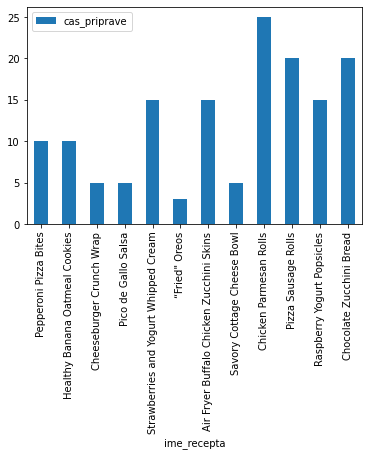

In [54]:
snacks[["ime_recepta", "kategorija", "cas_priprave"]].groupby("kategorija").plot.bar(x="ime_recepta", y="cas_priprave")

ANALIZA KAZENSKIH TOČK

In [55]:
analiza_kt =recepti_z_kategorijami[
    ["kategorija", "ogljikovi_hidrati", "beljakovine", "mascobe", "skupni_cas", "KT"]
].groupby("kategorija")

In [56]:
tocke = analiza_kt.mean()

In [57]:
tocke.sort_values("KT")

,ogljikovi_hidrati,beljakovine,mascobe,skupni_cas,KT
kategorija,,,,,
Soup,34.000000,15.000000,12.500000,45.000000,10.000000
School Lunch,29.666667,22.500000,8.000000,45.000000,16.333333
Meal Prep,20.500000,20.454545,10.090909,32.272727,22.545455
Appetizer,21.462500,12.662500,5.675000,34.687500,28.187500
Dinner,23.908000,25.576000,10.912000,35.160000,28.800000
...,...,...,...,...,...
Breakfast,24.062500,11.225000,8.420833,35.000000,44.916667
Side Dish,23.636364,5.609091,5.940909,37.045455,47.727273
Brunch,24.547619,12.352381,8.790476,37.619048,50.142857


Zmagovalna kategorija je Soup.